In [1]:
!pip install yfinance matplotlib pandas numpy

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# Загрузка данных о цене акций за последний год
msft_data = yf.download("MSFT", start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


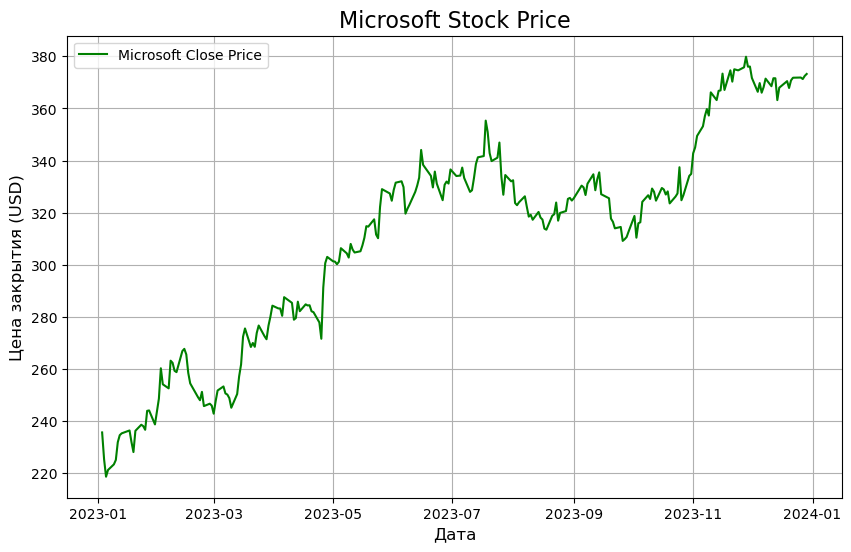

In [7]:
# Отображение временного ряда на графике
plt.figure(figsize=(10, 6))
plt.plot(msft_data['Close'], label='Microsoft Close Price', color='green')
plt.title('Microsoft Stock Price', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена закрытия (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


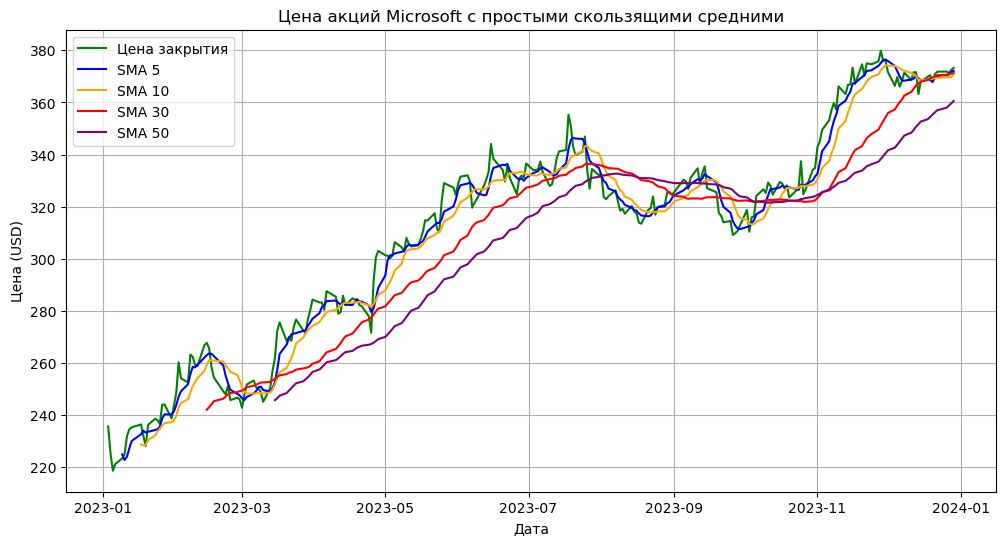

In [9]:
msft_data['SMA_5'] = msft_data['Close'].rolling(window=5).mean()
msft_data['SMA_10'] = msft_data['Close'].rolling(window=10).mean()
msft_data['SMA_30'] = msft_data['Close'].rolling(window=30).mean()
msft_data['SMA_50'] = msft_data['Close'].rolling(window=50).mean()

# Построение графика с ценами закрытия и скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Close'], label='Цена закрытия', color='green')
plt.plot(msft_data['SMA_5'], label='SMA 5', color='blue')
plt.plot(msft_data['SMA_10'], label='SMA 10', color='orange')
plt.plot(msft_data['SMA_30'], label='SMA 30', color='red')
plt.plot(msft_data['SMA_50'], label='SMA 50', color='purple')

# Настройки графика
plt.title('Цена акций Microsoft с простыми скользящими средними')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()

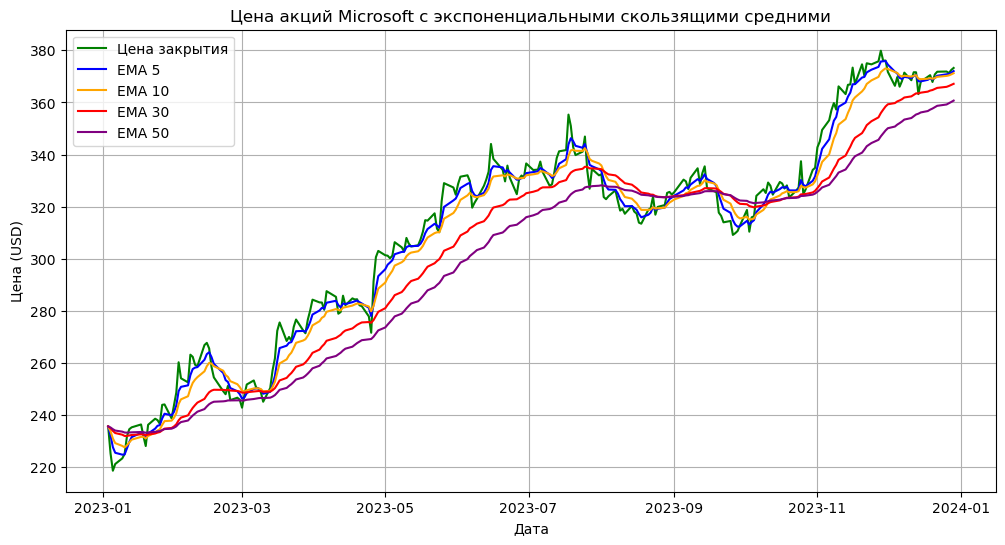

In [11]:
msft_data['EMA_5'] = msft_data['Close'].ewm(span=5, adjust=False).mean()
msft_data['EMA_10'] = msft_data['Close'].ewm(span=10, adjust=False).mean()
msft_data['EMA_30'] = msft_data['Close'].ewm(span=30, adjust=False).mean()
msft_data['EMA_50'] = msft_data['Close'].ewm(span=50, adjust=False).mean()

# Построение графика с ценами закрытия и экспоненциальными скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Close'], label='Цена закрытия', color='green')
plt.plot(msft_data['EMA_5'], label='EMA 5', color='blue')
plt.plot(msft_data['EMA_10'], label='EMA 10', color='orange')
plt.plot(msft_data['EMA_30'], label='EMA 30', color='red')
plt.plot(msft_data['EMA_50'], label='EMA 50', color='purple')

# Настройки графика
plt.title('Цена акций Microsoft с экспоненциальными скользящими средними')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import pandas as pd

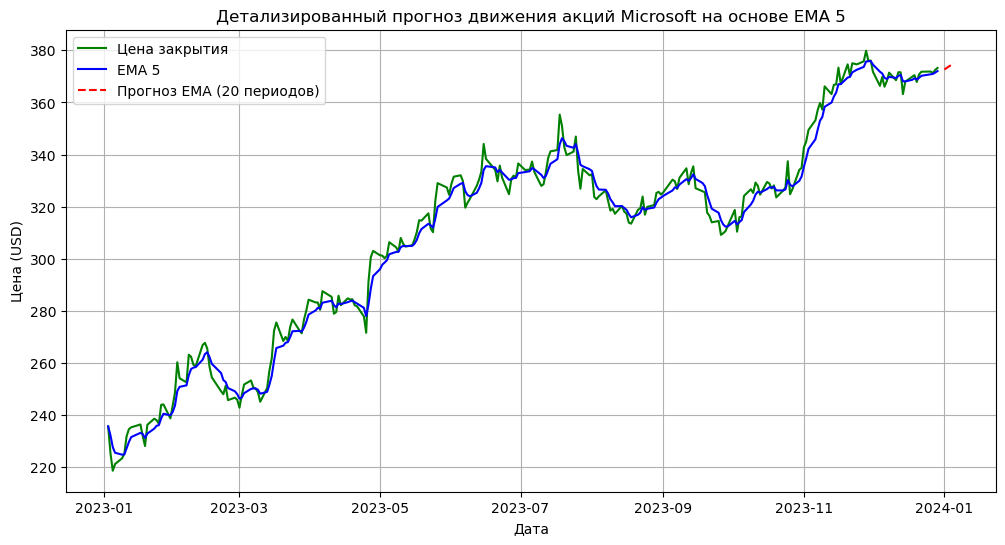

In [39]:
# Рассчитываем темп изменения EMA
ema_growth_rate = (msft_data['EMA_5'].iloc[-1] / msft_data['EMA_5'].iloc[-2]) - 1  # Рост между последними двумя точками EMA

# Прогноз на основе темпа роста EMA
forecast_periods = 5  # Увеличиваем количество прогнозируемых периодов
forecast = []
last_ema = msft_data['EMA_5'].iloc[-1]

# Прогнозируем будущие значения EMA с учетом темпа роста
for i in range(forecast_periods):
    forecast.append(last_ema * (1 + ema_growth_rate)**(i + 1))

# Создаем даты для прогноза
forecast_dates = pd.date_range(start=msft_data.index[-1], periods=forecast_periods + 1, freq='B')[1:]

# Построение графика с прогнозом
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Close'], label='Цена закрытия', color='green')
plt.plot(msft_data['EMA_5'], label='EMA 5', color='blue')
plt.plot(forecast_dates, forecast, label='Прогноз EMA (20 периодов)', linestyle='--', color='red')

plt.title('Детализированный прогноз движения акций Microsoft на основе EMA 5')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Выводы по проведенному анализу

Проведенный анализ показал, что акции **Microsoft** в 2023 году следуют восходящему тренду, с несколькими коррекциями. Простые скользящие средние (**SMA**) и экспоненциальные скользящие средние (**EMA**) помогли выявить основные тренды, при этом **EMA** оказались более чувствительными к последним изменениям в ценах. Прогноз, основанный на **EMA 5**, предполагает продолжение текущего уровня цен в краткосрочной перспективе.

В целом, использование этих методов анализа помогает понять возможные сигналы для покупки или продажи и способствует оценке как краткосрочных, так и долгосрочных трендов.
